# **Human Resource Analysis for Predicting Employee Leaving Status**

**1. Giriş**

<div>
<img src="https://i2.wp.com/www.iedunote.com/img/21498/employee-turnover-scaled.jpg?fit=2560%2C1457&quality=100&ssl=1
" width="600"/>
</div>

İnsan kaynakları bağlamında ciro, bir çalışanı yeni bir çalışanla değiştirme eylemidir. Kuruluşlar ve çalışanlar arasındaki ayrılıklar işten çıkarma, emeklilik, ölüm, kurumlar arası devir ve istifalardan oluşabilir. Bir kuruluşun cirosu, ciro oranı olarak adlandırılan yüzde oranı olarak ölçülür. Bu çalışmada çalışan istihdamını devam ettirmenin hızlı ve sürekli olması için işten ayrılma durumlarının toplanan verilere göre önceden belirlenebilmesi üzerine çalışmalar yapılmıştır.

**1.1 Problem Tanımı**

Bu uygulamada çalışanların işten ayrılıp ayrılmadığı tahmin edilecektir.


Bu uygulamada kullanacağımız veri seti bir şirkete ait insan kaynakları departmanı tarafından toplanmış 14999 kişiye ait verileri içerir. 

[Data Source](https://www.kaggle.com/kuniowu/human-resource)

**İçindekiler**


**2.**   [Veri Ön işlenmesi ve Analizi](#cell-id1)

*  **2.1**   [Veri Analizi](#cell-id2)

*   **2.2** [Kategorik Veriye Geçiş](#cell-id3)

*   **2.3**  [Normalizasyon](#cell-id4)

*   **2.4**  [Eğitim/Test Verisinin Ayrılması](#cell-id5)

**3.**   [Karar Ağaçları](#cell-id6)

**4.** [Yapay Sinir Ağları](#cell-id7) 

**5.** [Destek Vektör Makinaları](#cell-id8)

**6.** [K- en yakın komşu sınıflandırıcısı](#cell-id9)  



## Modülleri İçe Aktar

In [ ]:
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly
import plotly.graph_objs as go
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import graphviz 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc 
import keras
from keras import regularizers
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint

<a name="cell-id1"></a>
## **2.** Veri Ön İşlenmesi ve Analizi

<div>
<img src="https://elearningindustry.com/wp-content/uploads/2015/11/training-audience-analysis-human-resources-friend.jpg" width="500"/>
</div>

Veri setimizde:
* Çalışan memnuniyet oranı, (satisfaction_level) (0-1 aralığında)
* Son değerlendirme (last_evaluation) (0-1 aralığında)
* Proje sayısı (number_project)
* Ortalama aylık çalışma süresi (average_monthly_hours)
* Şirkette geçirilen yıl (time_spent_company)
* İş kazası geçirilip geçirilmediği (work_accident)
* Son 5 yılda promosyon alıp almadığı (promotion_last_5_years)
* Departman(sales)
* Maaş (salary) - (low, medium or high)
* Çalışanın işten ayrılıp ayrılmadığı (left) bilgisi

Şeklinde tanımlanmış öznitelikler bulunmaktadır. 

<a name="cell-id2"></a>
### **2.1** Data Analysis

In [ ]:
data = pd.read_csv("/content/HR.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

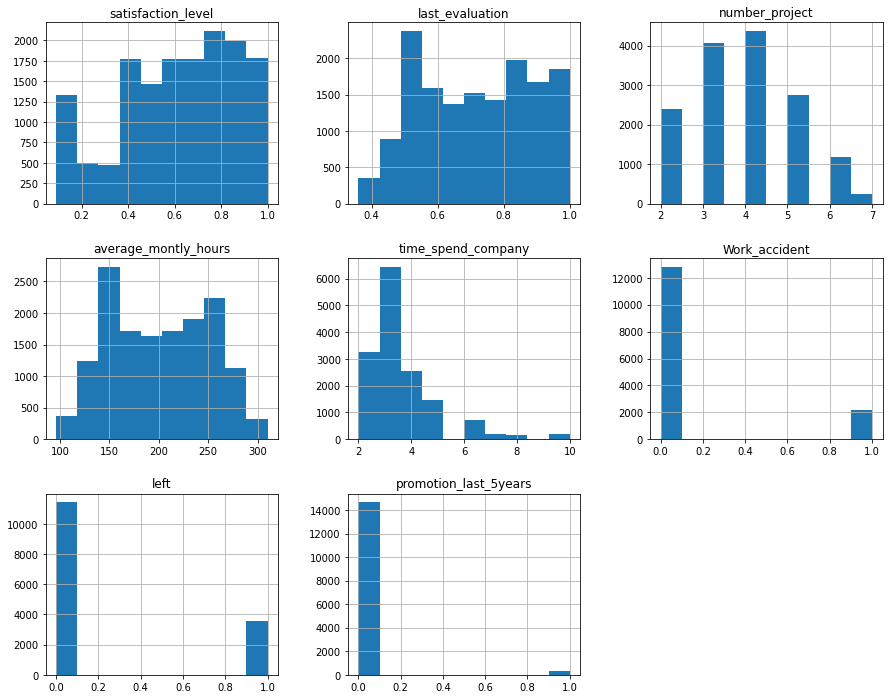

In [ ]:
fig = data.hist(figsize=(15,12))

In [ ]:
fig = px.box(data.iloc[::,:5].melt(), 
             y='value', 
             facet_col='variable', 
             color="variable",
             labels={'variable': 'feature'})

fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(
    title_text='Box Plot of Features',
    title_font_size=18,
    showlegend=False)

fig.show()

In [ ]:
salary = data['salary'].value_counts()
fig = go.Figure()
for salary_type in salary.index:
    y = salary[salary_type]
    x = salary_type
    fig.add_trace(go.Bar(x=[x], 
                         y=[y], 
                         name=salary_type,
                         text=str(y)))
    
fig.update_traces(texttemplate='%{text:}', textposition='outside')

fig.update_layout(
    title='Number of salaries',
    title_font_size=18,
    yaxis_title="Count of salary types",
    width=500,
    height=500,)

fig.show()

In [ ]:
salary = data['sales'].value_counts()
fig = go.Figure()
for salary_type in salary.index:
    y = salary[salary_type]
    x = salary_type
    fig.add_trace(go.Bar(x=[x], 
                         y=[y], 
                         name=salary_type,
                         text=str(y)))
    
fig.update_traces(texttemplate='%{text:}', textposition='outside')

fig.update_layout(
    title='Number of sales',
    title_font_size=18,
    yaxis_title="Count of sales types",
    width=500,
    height=500,)

fig.show()

In [ ]:
promotion = data['promotion_last_5years'].value_counts()
promotion.index =('No promotion', 'Had a promotion')
values = []
labels = []
colors = ['lightgreen', 'aliceblue']
for val in promotion.index:
    values.append(promotion[val])
    labels.append(val)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])


fig.update_layout(
    title='Count of promotion last 5 years',
    title_font_size=18,
    width=500,
    height=500,)

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

In [ ]:
accident = data['Work_accident'].value_counts()
accident.index =('No accident', 'Accident')
values = []
labels = []
colors = ['darkorange', 'lightgreen']
for acc in accident.index:
    values.append(accident[acc])
    labels.append(acc)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])


fig.update_layout(
    title='Work Accident Counts',
    title_font_size=18,
    width=500,
    height=500,)

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

In [ ]:
left = data['left'].value_counts()
left.index =('Current', 'Left')
values = []
labels = []
colors = ['gold', 'mediumturquoise']
for l in left.index:
    values.append(left[l])
    labels.append(l)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])


fig.update_layout(
    title='Layoffs and non-quitrs',
    title_font_size=18,
    width=500,
    height=500,)

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
left = data.copy()
left['left'] = left['left'].replace(to_replace =[0], 
                            value ="Current")
left['left'] = left['left'].replace(to_replace =[1], 
                            value ="Left")
fig = px.histogram(left, 
                   x='sales', 
                   color='left', 
                   barmode='group', 
                   width=600, 
                   title='Number of counts employee leaving for each department')
fig.show()

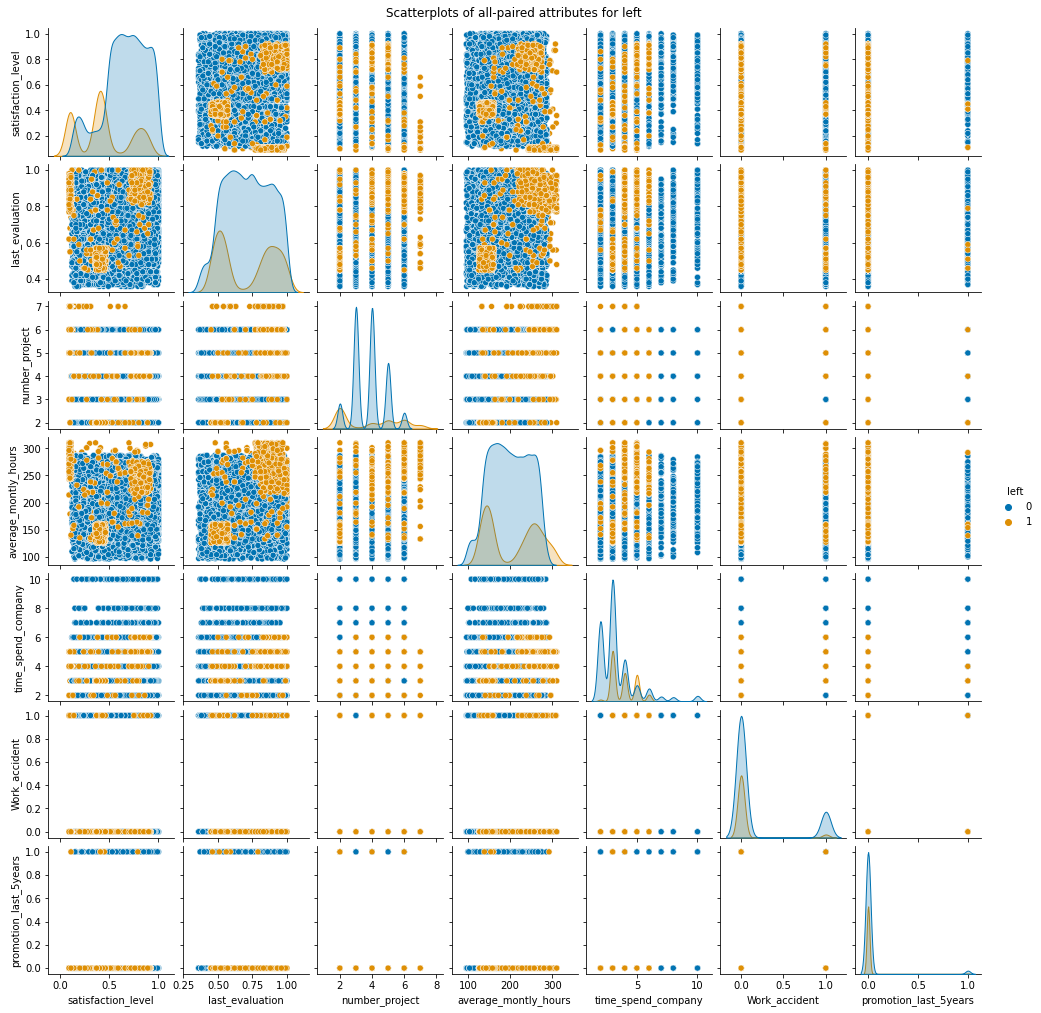

In [ ]:
fig = sns.pairplot(data, hue='left', height = 2, palette = 'colorblind').fig.suptitle("Scatterplots of all-paired attributes for left", y=1.006)

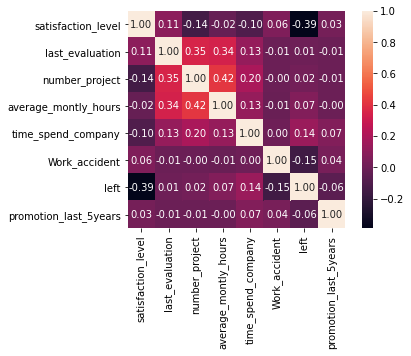

In [ ]:
fig = sns.heatmap(data.corr(), annot = True, square = True, fmt='.2f')

<a name="cell-id3"></a>
### **2.2** Categorical Data

In [ ]:
categorical = data[['sales', 'salary']]
categorical = pd.concat([pd.get_dummies(categorical['sales']), 
                         pd.get_dummies(categorical['salary'])], 
                        axis=1)
categorical

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
data = data.drop(['sales', 'salary'], axis=1)
data = pd.concat([categorical, data], axis=1)
data

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.38,0.53,2,157,3,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.80,0.86,5,262,6,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0.11,0.88,7,272,4,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0.72,0.87,5,223,5,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0,0.40,0.57,2,151,3,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.48,2,160,3,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.53,2,143,3,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0,0.11,0.96,6,280,4,0,1,0


<a name="cell-id4"></a>
### **2.3** Normalization

Veri içerisindeki özniteliklerin model eğitiminde birbirlerine baskın gelmemesi açısından değerler 0 ile 1 arasına normalize edilir.

In [ ]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0


<a name="cell-id5"></a>
### **2.4** Train/Test Split

Verinin %80'i modeli eğitmek için kullanılırken, %20'si ondan oluşturulan modeli test etmek için kullanılacak şekilde bölünür.

In [ ]:
X = scaled_data.drop("left", axis=1)
Y = scaled_data["left"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<a name="cell-id6"></a>
## **3.** Karar Ağaçları


Sınıflandırma iki aşamadan oluşur. Birinci aşamada öğrenme gerçekleşir. İkinci aşamada tahmin modeli çalıştırılır. Tahmin edilen değerler ile test değerlerinin ne kadar doğru olup olmadığı ile ilgili olarak sınıflandırma kalitesi ortaya çıkar. 

Karar ağaçları en kolay uygulanan sınıflandırma algoritmalarından birisidir. 

**Adımlar**

1. Özellik seçim ölçütlerini kullanarak en iyi özelliği belirle.
2. Seçilen özelliği karar nodu yap ve veri setini kümelere ayır.
3. Bu işlemi her bir dal için yap taa ki, her özellik değeri bir sınıfa ait olana kadar.

**Özellik Seçim Ölçütleri**

Burada başlangıçta dallanmayı nereden yapacağımıza dair en iyi özellik seçimi gerçekleştirilir. Özellik Seçim Ölçütleri sayesinde her bir özelliğin birbirleri ile olan sıralamasını gerçekleştiririz. Ardından en iyi skora sahip olan özellik ile dallandırmaya başlarız. Eğer özelliklerde sürekli değişkenler varsa bölme noktalarının da ayrıca belirlenmesi gerekir. 

**Bilgi Kazanımı**

Entropi veri setinin ne kadar kirliliğe sahip olduğunun ölçüsüdür. Fizikte ya da matematikte entropi sistemdeki kirlilik ya da rastgelelik olarak tanımlanır. Bilgi kazanımı entropinin azalması anlamına gelir. Bilgi Kazanımı bölünmeden önceki ve sonraki entropiyi kıyaslayarak arasındaki farkı ölçer. ID3 algoritması bilgi kazanımını aşağıdaki formül ile hesaplar:

$ Info(D) = - \sum_{i=1}^{m}p_ilog_2p_i$

$p_i$ i özelliğinin sınıfa ait olma olasılığı demektir.  

$Info_A(D)=\sum_{j=1}^V\frac{D_j}{D}\times Info{(D_j)}$  
$Gain(A)=Info(D)-Info_A(D)$

$Info(D)$ D içerisindeki bir sınıfa ait olmak için gereken ortalama bilgi  
$\frac{D_j}{D}$ j bölünmesinin ağırlığı
$Info_A(D)$ A bölünmesinin ardından D ye ait bir sınıfın tanımlanmasının beklenen bilgi değeri



In [ ]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    scores_list = []
    scores_std = []
    scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        dtc = tree.DecisionTreeClassifier(max_depth=depth)
        scores = cross_val_score(dtc, X, y, cv=cv, scoring=scoring)
        scores_list.append(scores)
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        accuracy_scores.append(dtc.fit(X, y).score(X, y))
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return scores_mean, scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, scores_mean, scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(depths, scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, scores_mean-2*scores_std, scores_mean+2*scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

İdeal olarak, bölgeler bölünme sayısıyla birlikte giderek daha saf hale gelmelidir. Her bölge tek bir sınıfa (devam ediyor veya ayrıldı) doğru uzmanlaşmalıdır. Bu ayrımın kalitesini Sınıflandırma Hatasını ölçerek değerlendirmek yaygındır . Bölgenin saflığı, sözde Gini İndeksi kullanılarak da değerlendirilebilir . Alternatif olarak, bölgenin Entropisi safsızlık seviyesini söyleyebilir.

Eğitim sırasında ağaç, her bölge tam olarak bir eğitim noktası içerene kadar (% 100 eğitim doğruluğu) büyümeye devam edecektir. Yani ağaç eğitim verilerine tam oturacaktır. Aşırı yerleştirilmiş bir ağaç, eğitim gözlemlerinin mükemmel bir sınıflandırmasını elde eder ve sapma (hata) 0 olur . Bununla birlikte, böyle bir ağaç çok hassas olacaktır çünkü eğitim gözlemlerindeki küçük değişiklikler, tahmin edilen sınıfların büyük ölçüde değişmesine neden olacaktır, bu , model varyansının çok yüksek olacağı anlamına gelir . Model, görünmeyen veriler üzerinde iyi bir genelleme yapmaz.

K-kat çapraz doğrulama kullanarak her derinlik için tahmini performansı +/- 2 standart sapmayı değerlendirmek ve çizmek için bir dizi ağaç derinliği seçmektir. Aşağıdaki analizde, ağaç derinliği 8 idealdir çünkü eğitim verilerinde en iyi ortalama doğruluğu elde eder. Doğruluğun güven aralığının alt sınırı, bu değeri önemli kılacak kadar yüksektir. Ağaca daha fazla düğüm eklendiğinde, çapraz doğrulama doğruluğunun neredeyse sabit kaldığı açıktır.
Derinlik ağacı 12, eğitim setinde mükemmel doğruluk (% 100) elde eder, bu, ağacın her yaprağının tam olarak bir örnek içerdiği ve bu örneğin sınıfının tahmin olacağı anlamına gelir. 

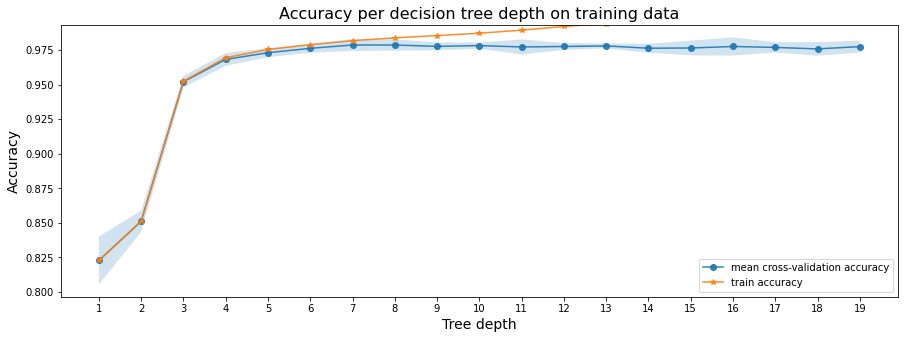

In [ ]:
tree_depths_range = range(1,20)
scores_mean, scores_std, accuracy_scores = run_cross_validation_on_trees(x_train, y_train, tree_depths_range)

plot_cross_validation_on_trees(tree_depths_range, 
                               scores_mean, 
                               scores_std, 
                               accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_leaf_nodes=8, max_depth=8)

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Test ve eğitim verisi üzerindeki model başarımına bakalım.

In [ ]:
train_accuracy = accuracy_score(y_train, dtc.predict(x_train))
train_accuracy

0.9654137844820402

In [ ]:
test_accuracy = accuracy_score(y_test, dtc.predict(x_test))
test_accuracy

0.962

**Accuracy**

<div>
<img src="https://miro.medium.com/max/680/0*e4JiyxE6jd26_v5B" width="200"/>
</div>

<div>
<img src="https://miro.medium.com/max/660/0*gAraRxYQmMwBjfl_" width="200"/>
</div>

<div>
<img src="https://miro.medium.com/max/635/1*fs73f8yfCm6nI0QqADTJxg.png" width="200"/>
</div>

<div>
<img src="https://miro.medium.com/max/875/0*DaA9fG5env3JGp2k" width="200"/>
</div>



In [ ]:
print(classification_report(y_test, dtc.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2287
         1.0       0.93      0.91      0.92       713

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



Aşağıda gördüğümüz Confusion Matrix tablosu bir sınıflandırma probleminde gerçekleşen ve tahminlenen değerleri göstermektedir.

<div>
<img src="https://miro.medium.com/max/2512/1*SRjXgKaRVVcEwaxBtZIHcw.png" width="500"/>
</div>

True Positive ve True Negative modelin doğru olarak tahminlediği, False Positive ve False Negative ise modelin yanlış olarak tahminlediği alanlardır.

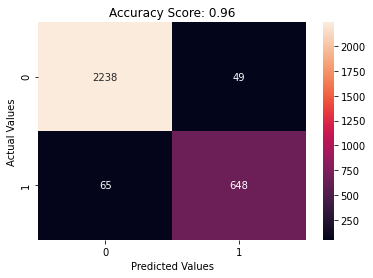

In [ ]:
matrix = confusion_matrix(y_test,dtc.predict(x_test))
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(test_accuracy), size=12)
plt.show()

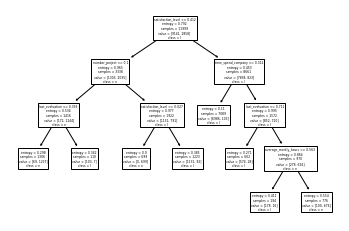

In [ ]:
tree.export_text(dtc)
tree.plot_tree(dtc,feature_names=X.columns, class_names='left');

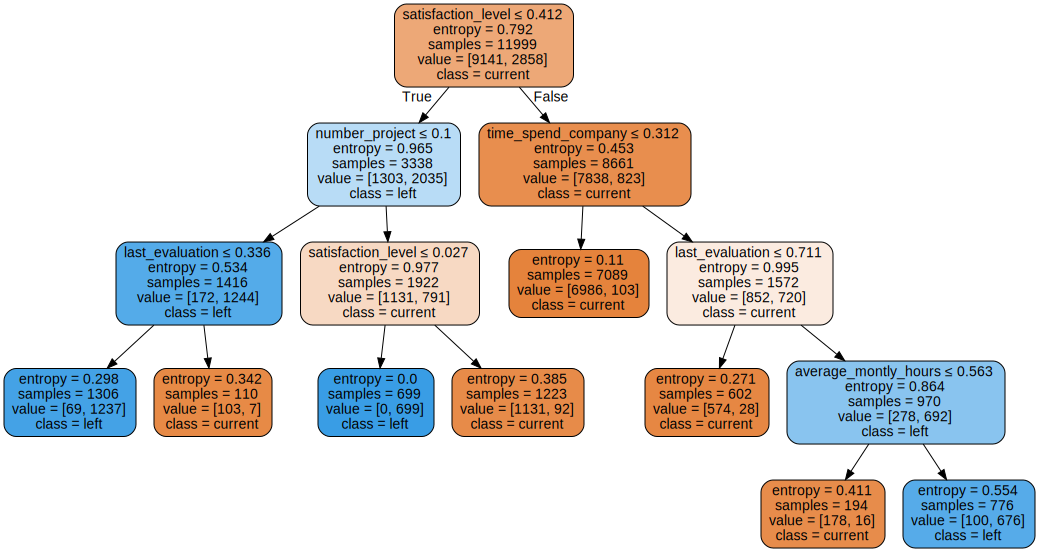

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("hr") 

dot_data = tree.export_graphviz(dtc, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['current','left'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

<a name="cell-id7"></a>
## **4.** Yapay Sinir Ağları

**Train-Set:** Modelin üzerinde eğitim gördüğü veri seti. Bu veri seti, geri yayılma sırasında ağırlıkların güncellendiği tek veri kümesidir.

**Doğrulama Kümesi (Geliştirme Kümesi):** Modelimizin iyi performans göstermesini istediğimiz veri kümesidir. Eğitim süreci sırasında, modelin geliştirici setinde iyi performans göstermesi için hiper parametreleri ayarlarız (ancak eğitim için dev-set kullanılmaz, yalnızca performansı görmek için kullanılır, böylece hiper -parametreler ve hiper parametreleri değiştirdikten sonra eğitim setinde eğitimimize devam ederiz). Dev-set, modeli bilinmeyen veriler üzerinde iyi çalışmaya uygun hale getirmek için yalnızca hiper parametrelerin ayarlanması için kullanılır (burada dev-set, doğrudan eğitim için kullanılmadığı ve ayrıca hiper -parametreler, eğitimin şeklini değiştirmek için ayar düğmeleri gibidir) ve dev-sette geri yayılma oluşmaz ve dolayısıyla doğrudan öğrenme olmaz.

**Test Seti:** Tarafsız tahmin için kullanıyoruz. Dev-set gibi, test setinde eğitim yapılmaz. Test seti gibi, dev-set doğrudan eğitim için kullanılmasa da, dev-set'i hedefleyen hiper parametreleri tekrar tekrar ayarladığımız için, modelimiz dolaylı olarak dev-set'ten kalıpları öğrenir ve dev-set artık bilinmez hale gelir. Bu nedenle dev-set'in yeni bir kopyasına ihtiyacımız vardır, hiper parametre ayarı için bile kullanılmamaktadır ve bu yeni dev-set kopyasını test seti olarak adlandırıyoruz. Test setinin tanımına göre model tarafından "bilinmeyen" olmalıdır. 


Özet olarak:

Train-Set: Eğitim amaçlı kullanılır.

Doğrulama Seti / Dev-Set: Hiper parametreleri ayarlamak için kullanılır.

Test Seti: Tarafsız tahmin için kullanılır.

In [ ]:
def create_dnn():
    model = keras.Sequential([ 
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae', 'accuracy'])

    return model

In [ ]:
acc_per_fold = []
loss_per_fold = []

num_folds = 5 
num_epochs = 28
batch_size = 16

kfold = KFold(n_splits=num_folds, shuffle=True)

model_filename = 'employee_turnover_model.h5'

callback_checkpoint = ModelCheckpoint(
    model_filename,
    verbose=1, 
    monitor='loss', 
    save_best_only=True,
)

fold_no = 1
for train, test in kfold.split(x_train, y_train):
    model = create_dnn()

    print('-'*50)
    print(f'Training for fold {fold_no} ... please wait..')

    steps_per_epoch = x_train.iloc[train].shape[0]//batch_size

    history = model.fit(x_train.iloc[train], y_train.iloc[train],
                        validation_split=0.2, 
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose = 1,
                        steps_per_epoch=steps_per_epoch,
                        callbacks=[callback_checkpoint])
    
    scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[2]} of {scores[2]*100}%')
    acc_per_fold.append(scores[2] * 100)
    loss_per_fold.append(scores[0])

    fold_no += 1


print('-'*50)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('-'*50)
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('-'*50)
print('Average scores for all folds:')
print(f'> Accuracy: %{np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print('-'*50)

--------------------------------------------------
Training for fold 1 ... please wait..
Epoch 1/28
599/599 [==============================] - 2s 2ms/step - loss: 0.5830 - mae: 0.3961 - accuracy: 0.7061 - val_loss: 0.4122 - val_mae: 0.2796 - val_accuracy: 0.7927

Epoch 00001: loss improved from inf to 0.53194, saving model to employee_turnover_model.h5
Epoch 2/28
599/599 [==============================] - 1s 2ms/step - loss: 0.4400 - mae: 0.2894 - accuracy: 0.7884 - val_loss: 0.3172 - val_mae: 0.2251 - val_accuracy: 0.8693

Epoch 00002: loss improved from 0.53194 to 0.41382, saving model to employee_turnover_model.h5
Epoch 3/28
599/599 [==============================] - 1s 2ms/step - loss: 0.3395 - mae: 0.2180 - accuracy: 0.8572 - val_loss: 0.2244 - val_mae: 0.1399 - val_accuracy: 0.9193

Epoch 00003: loss improved from 0.41382 to 0.32214, saving model to employee_turnover_model.h5
Epoch 4/28
599/599 [==============================] - 1s 2ms/step - loss: 0.2809 - mae: 0.1711 - accuracy

In [ ]:
plot_model(model, to_file='dnn.png', show_shapes=True)

Modelimizin test ve validasyon veri seti üzerindeki başarımını inceleyelim

In [ ]:
def plot_classifier_history(history, 
                            metrics=["accuracy", "val_accuracy"], 
                            losses=["loss", "val_loss"]):
    plt.figure(figsize=(8, 4))
    for metric in metrics:
        plt.plot(history.history[metric], linewidth=3)
    plt.suptitle("Accuracy over epochs", fontsize=20)
    plt.ylabel("accuracy", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(metrics, loc="center right", fontsize=15)
    plt.show()

    plt.figure(figsize=(8, 4))
    for loss in losses:
        plt.plot(history.history[loss], linewidth=3)
    plt.suptitle("Loss over epochs", fontsize=20)
    plt.ylabel("loss", fontsize=20)
    plt.xlabel("epoch", fontsize=20)
    plt.legend(losses, loc="center right", fontsize=15)
    plt.show()

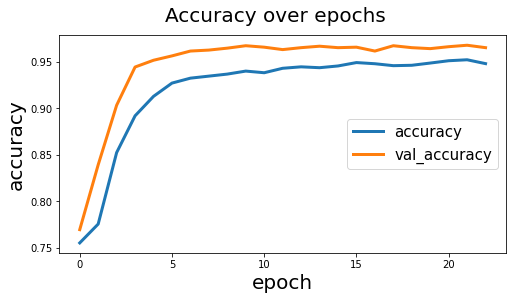

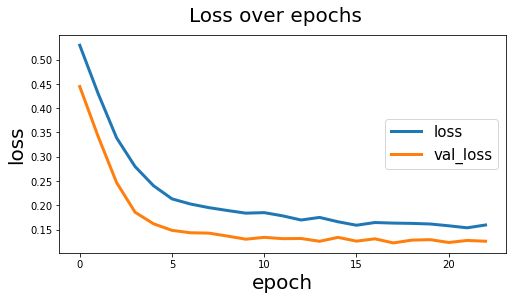

In [ ]:
plot_classifier_history(history)

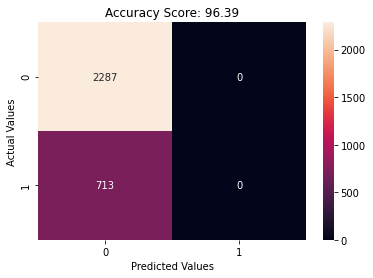

In [ ]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis = -1) 
matrix = confusion_matrix(y_test, y_predict)
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(np.mean(acc_per_fold)), size=12)
plt.show()

<a name="cell-id8"></a>
## **5.** SVM (Destek Vektör Makinaları)

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
print('All scores: ', clf.cv_results_['mean_test_score'])
print('All parameters: ', clf.cv_results_['params'])
print('Ranks for test scores: ', clf.cv_results_['rank_test_score'])
print('Std_dev per accuracy', clf.cv_results_['std_test_score'])

All scores:  [0.77681492 0.93816187 0.77656485 0.9478291 ]
All parameters:  [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}]
Ranks for test scores:  [3 2 4 1]
Std_dev per accuracy [0.00393861 0.00272594 0.00393072 0.00230094]


En iyi parametreleri seçip tekrardan değerlendirelim

In [ ]:
clf = SVC(C=10, kernel='rbf') 
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

In [ ]:
print(f"Classification report for SVM classifier:\n"
      f"{classification_report(y_test, predicted, digits=4)}\n")

Classification report for SVM classifier:
              precision    recall  f1-score   support

         0.0     0.9694    0.9711    0.9703      2287
         1.0     0.9069    0.9018    0.9044       713

    accuracy                         0.9547      3000
   macro avg     0.9382    0.9365    0.9373      3000
weighted avg     0.9546    0.9547    0.9546      3000




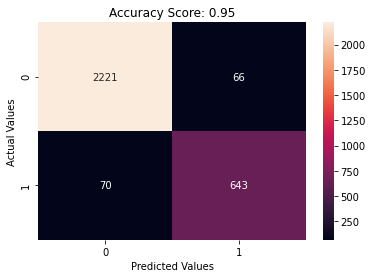

In [ ]:
matrix = confusion_matrix(y_test,predicted)
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(accuracy_score(y_test, clf.predict(x_test))), size=12)
plt.show()

<a name="cell-id9"></a>
## **6.** K- En yakın Komşu Sınıflandırıcısı (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
train_accuracy = accuracy_score(y_train, knn.predict(x_train))
train_accuracy

0.9758313192766064

In [ ]:
test_accuracy = accuracy_score(y_test, knn.predict(x_test))
test_accuracy

0.9493333333333334

In [ ]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2287
         1.0       0.86      0.93      0.90       713

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



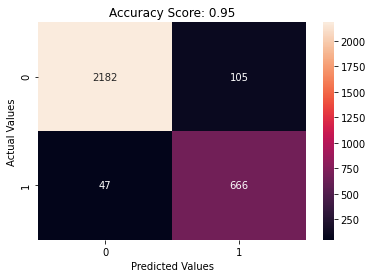

In [ ]:
matrix = confusion_matrix(y_test,knn.predict(x_test))
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(test_accuracy), size=12)
plt.show()

#**Referanslar**


*   [Scikit-Learn](https://scikit-learn.org/stable/)
*   [Precision & Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
*   [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree)
*   [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)
*   [ANN-Medium](https://medium.com/@fahrettinf/4-1-1-artificial-neural-networks-6257a7a54bb3)
*   [ANN-Paper](https://www.sciencedirect.com/topics/engineering/artificial-neural-network)
*   [Decision Tree Tutorial](https://scikit-learn.org/stable/modules/tree.html)
*   [Tutorials for Decision Tree](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) 
